In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/IntroAI_CCFraud

/content/drive/Shareddrives/IntroAI_CCFraud


In [ ]:
# !unzip archive.zip

Archive:  archive.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Save CSV file as dataframe
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

# EDA

## Preliminary EDA

In [ ]:
# Top of data
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0




*   There are 23 attributes to the dataset with the target variable being 'is_fraud'




In [ ]:
print(df_train.shape)
print(df_train.columns)
print(df_train.dtypes)

(1296675, 23)
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                flo



*   There are 1.29 million datapoints and 23 attributes.
*   Attributes are objects, floats, or ints.









In [ ]:
print(df_test.shape)
print(df_test.columns)
print(df_test.dtypes)

(555719, 23)
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                floa

555k test set size, ratio of about 42% test size

# Preliminary pre-processing and feature engineering

In [ ]:
# Drop unnamed, cc_num, first, last, street, trans_num, trans_date_trans_time
# These are immediately obvious irrelevant attributes
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'trans_date_trans_time']

df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

In [ ]:
# Check train dataset
df_train.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [ ]:
# Convert unix time to hour and week day

import pandas as pd

# Convert the unix_time to a datetime object
df_train['datetime'] = pd.to_datetime(df_train['unix_time'], unit='s')
df_test['datetime'] = pd.to_datetime(df_test['unix_time'], unit='s')

# Extract hour, day, month, and year
df_train['hour_of_day'] = df_train['datetime'].dt.hour
df_train['day_of_week'] = df_train['datetime'].dt.weekday

df_test['hour_of_day'] = df_test['datetime'].dt.hour
df_test['day_of_week'] = df_test['datetime'].dt.weekday

In [ ]:
# Convert DOB to age

from datetime import datetime

current_year = 2020
df_train['age'] = current_year - pd.to_datetime(df_train['dob']).dt.year
df_test['age'] = current_year - pd.to_datetime(df_test['dob']).dt.year

In [ ]:
# Convert lat, long, merch_lat, merch_long to distance from merchant

import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) * np.sin(dlat / 2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) * np.sin(dlon / 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df_train['distance_to_merchant'] = haversine_distance(df_train['lat'], df_train['long'], df_train['merch_lat'], df_train['merch_long'])
df_test['distance_to_merchant'] = haversine_distance(df_test['lat'], df_test['long'], df_test['merch_lat'], df_test['merch_long'])

In [ ]:
# Drop columns used in transformations

cols_to_drop = ['datetime', 'unix_time', 'dob']
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

In [ ]:
# Move target variable to back of dataset

# Store the 'is_fraud' column
train_is_fraud = df_train['is_fraud']
test_is_fraud = df_test['is_fraud']

# Drop the 'is_fraud' column
df_train.drop(columns=['is_fraud'], inplace=True)
df_test.drop(columns=['is_fraud'], inplace=True)

# Append 'is_fraud' to the end
df_train['is_fraud'] = train_is_fraud
df_test['is_fraud'] = test_is_fraud

In [ ]:
df_train

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,hour_of_day,day_of_week,age,distance_to_merchant,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,6,32,78.597568,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,6,42,30.212176,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,6,58,108.206083,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,6,53,95.673231,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,6,34,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,36.841266,-111.690765,12,4,59,119.752136,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",38.906881,-78.246528,12,4,41,75.104085,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,33.619513,-105.130529,12,4,53,99.047734,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,42.788940,-103.241160,12,4,40,84.627652,0


# Visualisation of attributes

                   amt      city_pop   hour_of_day   day_of_week  \
count     1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean      7.035104e+01  8.882444e+04  1.280486e+01  3.553481e+00   
std       1.603160e+02  3.019564e+05  6.817824e+00  1.952805e+00   
min       1.000000e+00  2.300000e+01  0.000000e+00  0.000000e+00   
25%       9.650000e+00  7.430000e+02  7.000000e+00  2.000000e+00   
50%       4.752000e+01  2.456000e+03  1.400000e+01  4.000000e+00   
75%       8.314000e+01  2.032800e+04  1.900000e+01  5.000000e+00   
max       2.894890e+04  2.906700e+06  2.300000e+01  6.000000e+00   
skewness  4.227787e+01  5.593853e+00 -2.828255e-01 -3.935005e-01   
kurtosis  4.545645e+03  3.761452e+01 -1.079580e+00 -1.071129e+00   

                   age  distance_to_merchant  
count     1.296675e+06          1.296675e+06  
mean      4.674255e+01          7.611465e+01  
std       1.737848e+01          2.911693e+01  
min       1.500000e+01          2.225452e-02  
25%       3.3000

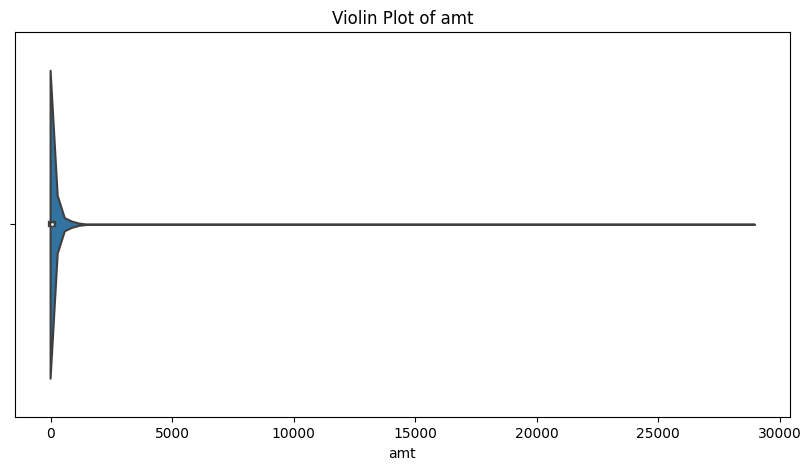

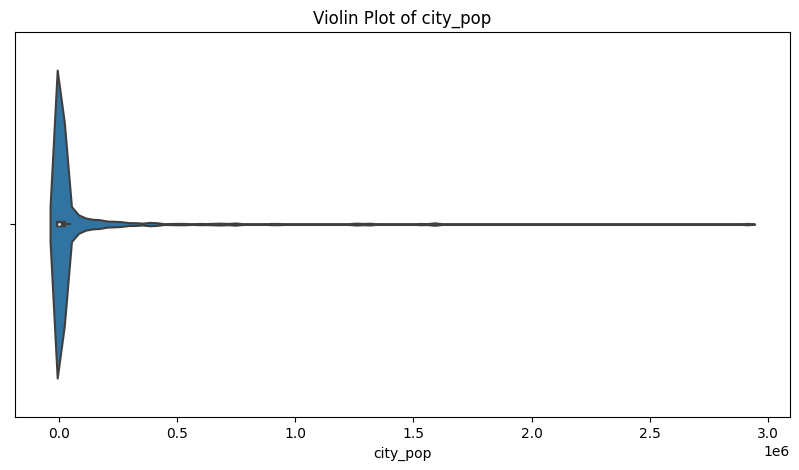

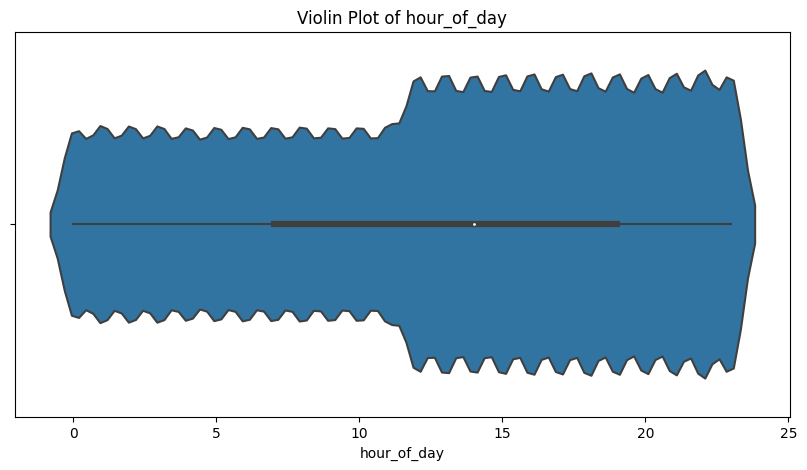

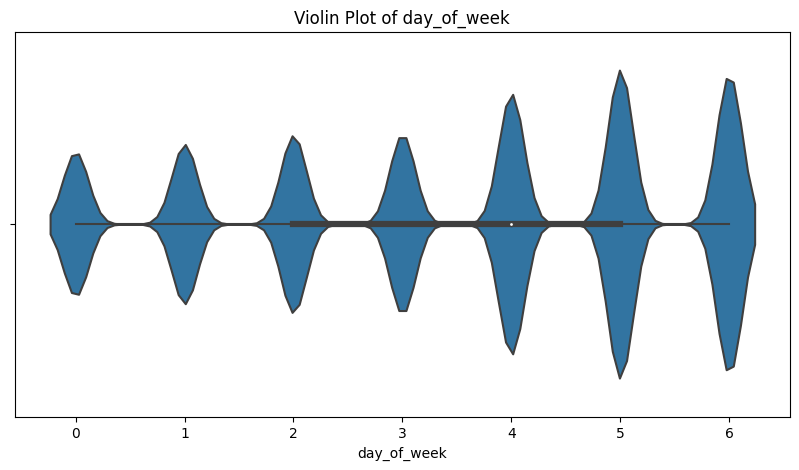

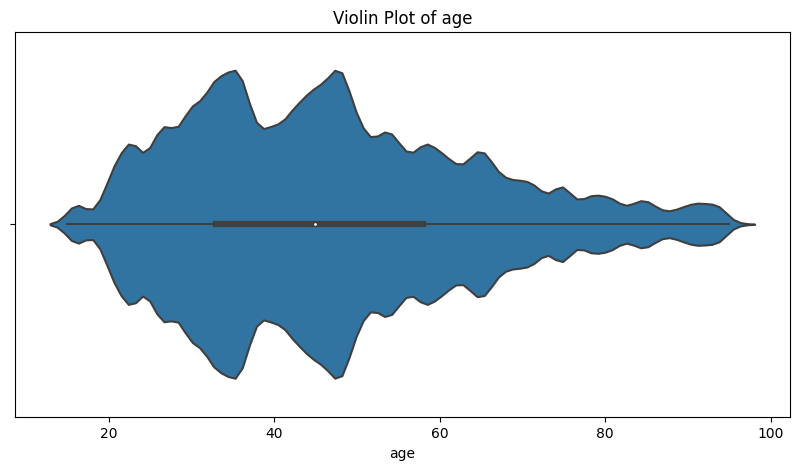

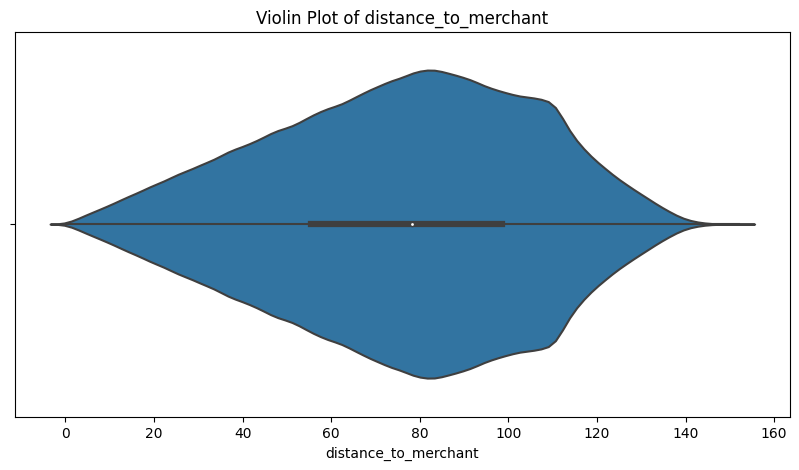

In [ ]:
# Interval Variables
interval_columns = ['amt', 'city_pop', 'hour_of_day', 'day_of_week', 'age', 'distance_to_merchant']

# Calculate skewness and kurtosis using pandas methods
skewness_values = df_train[interval_columns].skew()
kurtosis_values = df_train[interval_columns].kurtosis()

# Convert them to DataFrame format with proper indexing
skewness_df = pd.DataFrame([skewness_values], index=['skewness'])
kurtosis_df = pd.DataFrame([kurtosis_values], index=['kurtosis'])

# Concatenate describe() output with skewness and kurtosis
description = pd.concat([df_train[interval_columns].describe(), skewness_df, kurtosis_df])

print(description)

# Violin Plot for Interval Variables
for col in interval_columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=df_train[col])
    plt.title(f"Violin Plot of {col}")
    plt.show()

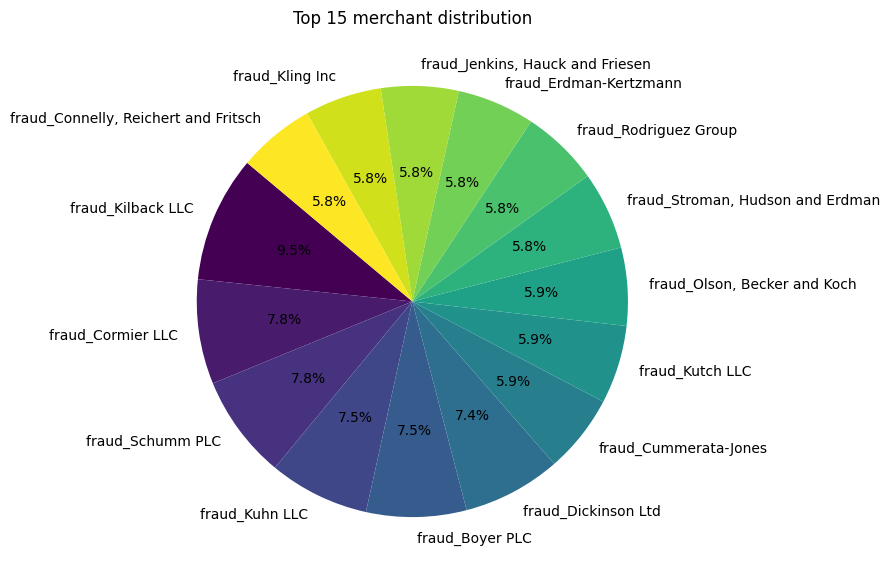

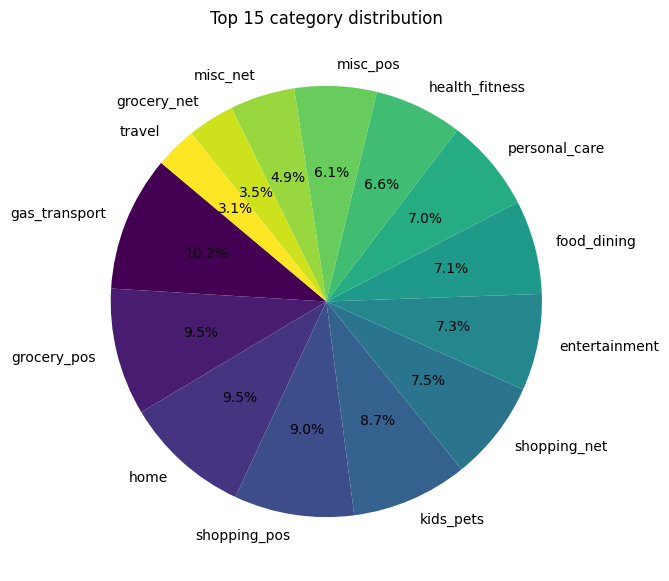

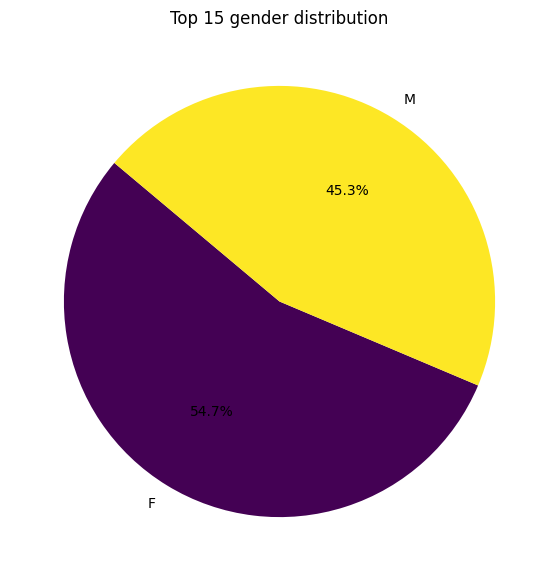

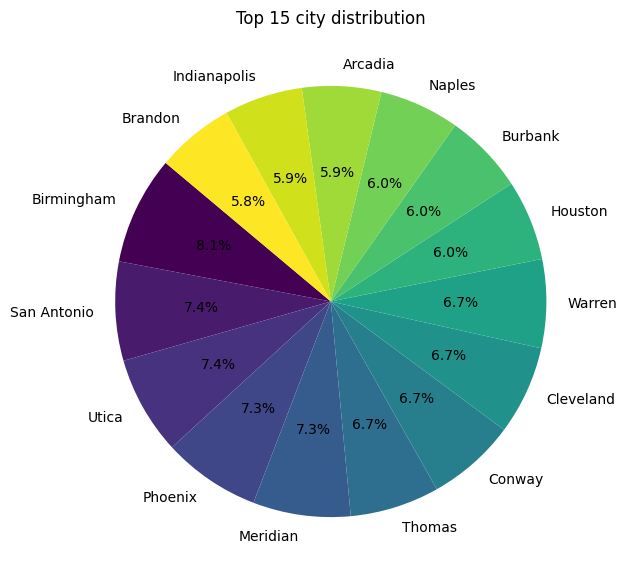

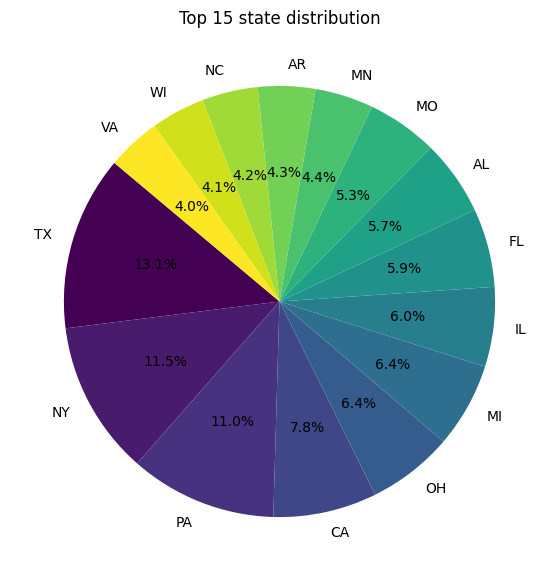

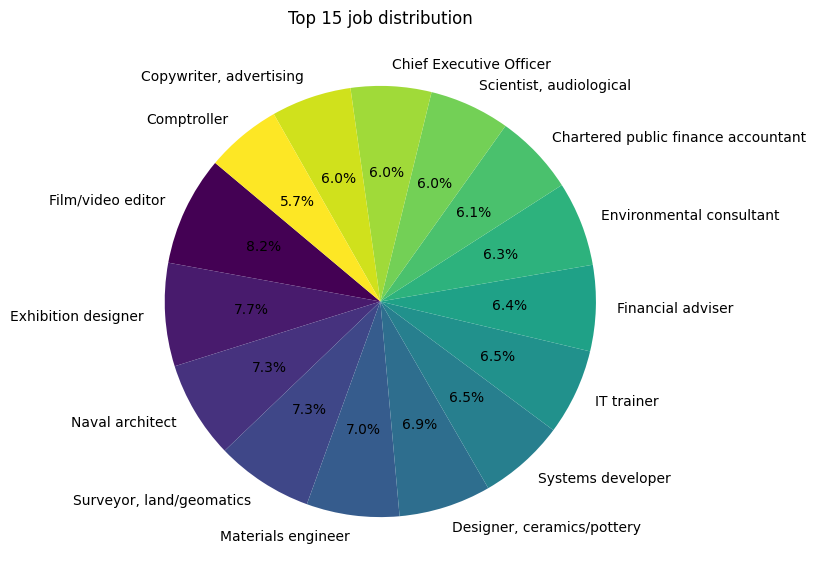

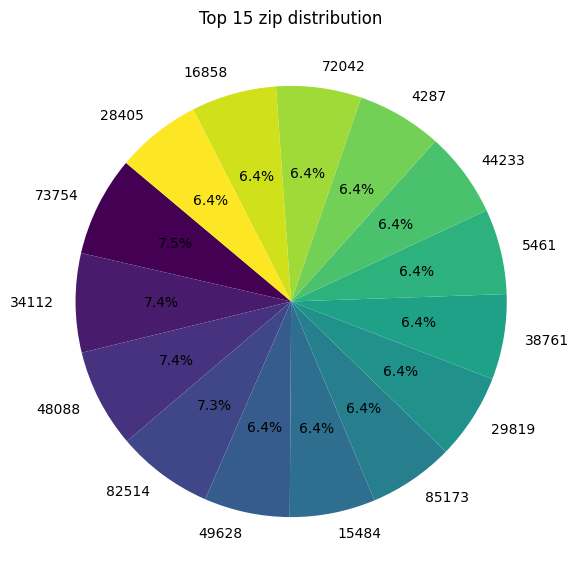

In [ ]:
import matplotlib.pyplot as plt

categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job', 'zip']

for col in categorical_columns:
    # Get the top 15 categories based on counts
    top_15_values = df_train[col].value_counts().nlargest(15)

    plt.figure(figsize=(10, 7))
    top_15_values.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.gca().set_aspect('equal')

    plt.title(f"Top 15 {col} distribution")
    plt.ylabel('') # Removing the default column name as ylabel
    plt.show()

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64


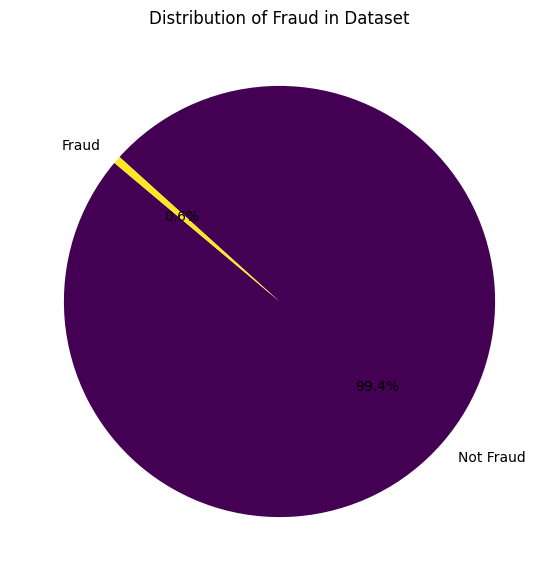

In [ ]:
# Target variable exploration
fraud_counts = df_train['is_fraud'].value_counts()

print(fraud_counts / len(df_train))

plt.figure(figsize=(10, 7))
fraud_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis', labels=['Not Fraud', 'Fraud'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_aspect('equal')
plt.title('Distribution of Fraud in Dataset')
plt.ylabel('') # Removing the default column name as ylabel

plt.show()

## Correlation Assessment

<ipython-input-20-fc8df7e8268b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


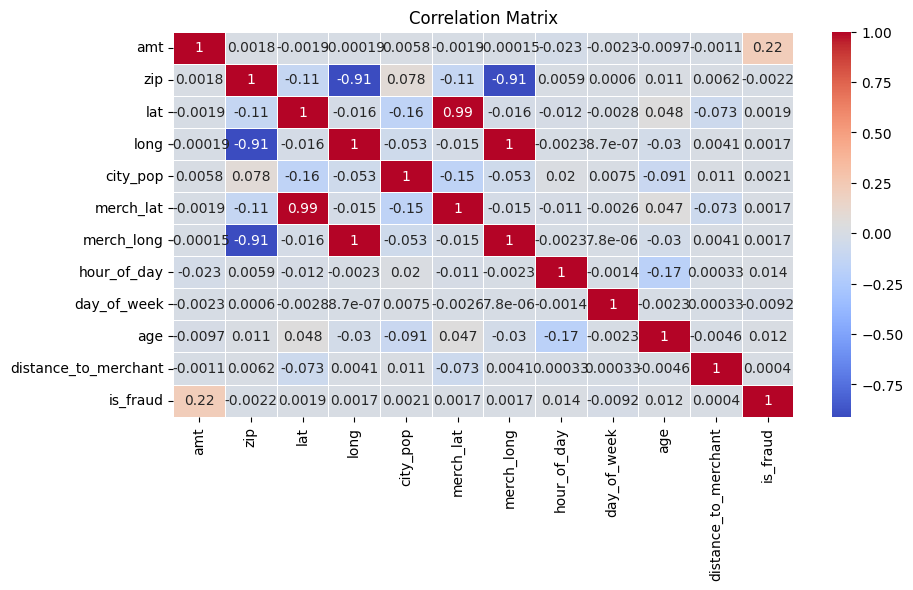

In [ ]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Correlation of attributes to target variable
print(df_train.corr()['is_fraud'].sort_values(ascending=False))

<ipython-input-21-6f4da3db3200>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_train.corr()['is_fraud'].sort_values(ascending=False))


is_fraud                1.000000
amt                     0.219404
hour_of_day             0.013799
age                     0.012378
city_pop                0.002136
lat                     0.001894
merch_lat               0.001741
merch_long              0.001721
long                    0.001721
distance_to_merchant    0.000403
zip                    -0.002162
day_of_week            -0.009222
Name: is_fraud, dtype: float64


# Additional Pre-Processing

In [ ]:
# Check for missing values
df_train.isnull().sum()

merchant                0
category                0
amt                     0
gender                  0
city                    0
state                   0
zip                     0
lat                     0
long                    0
city_pop                0
job                     0
merch_lat               0
merch_long              0
hour_of_day             0
day_of_week             0
age                     0
distance_to_merchant    0
is_fraud                0
dtype: int64

In [ ]:
# Drop columns with heavy correlation

cols_to_drop = ['zip', 'merch_long', 'merch_lat']
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

In [ ]:
# Label encoding required for Decision Tree and Gradient Boosting

from sklearn.preprocessing import LabelEncoder

def custom_label_encoding(train_series, test_series):
    # Convert both series to strings
    train_series = train_series.astype(str)
    test_series = test_series.astype(str)

    le = LabelEncoder()

    # Using pandas.concat to merge train and test series
    le.fit(pd.concat([train_series, test_series], ignore_index=True))

    return le.transform(train_series), le.transform(test_series)

for col in ['merchant', 'category', 'gender', 'city', 'state', 'job']:
    df_train[col], df_test[col] = custom_label_encoding(df_train[col], df_test[col])

In [ ]:
df_train

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,hour_of_day,day_of_week,age,distance_to_merchant,is_fraud
0,462,12,4.97,0,475,27,36.0788,-81.1781,3495,372,0,6,32,78.597568,0
1,159,8,107.23,0,571,47,48.8878,-118.2105,149,431,0,6,42,30.212176,0
2,324,0,220.11,1,410,13,42.1808,-112.2620,4154,308,0,6,58,108.206083,0
3,291,6,45.00,1,823,26,46.2306,-112.1138,1939,330,0,6,53,95.673231,0
4,220,13,41.96,1,131,45,38.4207,-79.4629,99,116,0,6,34,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,444,0,15.56,1,258,44,37.7175,-112.4777,258,216,12,4,59,119.752136,0
1296671,112,1,51.70,1,794,20,39.2667,-77.5101,100,362,12,4,41,75.104085,0
1296672,555,1,105.93,1,275,32,32.9396,-105.8189,899,309,12,4,53,99.047734,0
1296673,456,1,74.90,1,414,41,43.3526,-102.5411,1126,488,12,4,40,84.627652,0


In [ ]:
df_test

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,hour_of_day,day_of_week,age,distance_to_merchant,is_fraud
0,245,2,2.86,1,1051,40,33.9659,-80.9355,333497,288,12,4,52,24.561462,0
1,547,2,29.84,0,910,44,40.3207,-110.4360,302,406,12,4,30,104.925092,0
2,570,9,41.28,0,955,34,40.6729,-73.5365,34496,272,12,4,50,59.080078,0
3,138,13,60.05,1,1658,9,28.5697,-80.8191,54767,422,12,4,33,27.698567,0
4,215,5,3.19,1,1141,22,44.2529,-85.0170,1126,205,12,4,65,104.335106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,454,9,43.77,1,1337,24,40.4931,-91.8912,519,477,23,1,54,77.026148,0
555715,184,11,111.84,1,1295,43,29.0393,-95.4401,28739,207,23,1,21,100.074420,0
555716,441,11,86.88,0,998,47,46.1966,-118.9017,3684,307,23,1,39,80.759302,0
555717,666,5,7.99,1,1370,13,44.6255,-116.4493,129,63,23,1,55,52.933240,0


# Train Validate Test Split and Resampling

In [ ]:
# Dropping the target variable and defining the target:
X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [ ]:
from imblearn.combine import SMOTEENN

# Initializing SMOTEENN
smote_enn = SMOTEENN(random_state=42)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

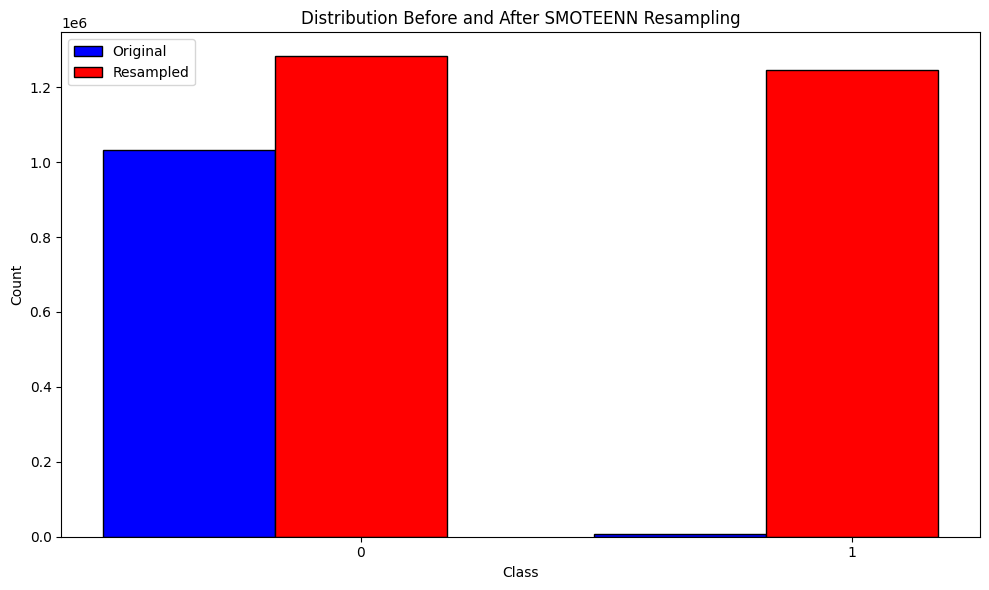

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the instances of each class in the original and resampled datasets
original_counts = y_train.value_counts()
resampled_counts = y_train_resampled.value_counts()

# Set up the bar positions
bar_width = 0.35
r1 = np.arange(len(original_counts))
r2 = [x + bar_width for x in r1]

# Plotting both distributions on the same plot
plt.figure(figsize=(10, 6))

# Bar plots
plt.bar(r1, original_counts, width=bar_width, color='b', edgecolor='k', label='Original')
plt.bar(r2, resampled_counts, width=bar_width, color='r', edgecolor='k', label='Resampled')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution Before and After SMOTEENN Resampling')
plt.xticks([r + bar_width for r in range(len(original_counts))], original_counts.index)
plt.legend()

plt.tight_layout()
plt.show()

# Model Training

## Decision Tree

## Gradient Boosting

In [ ]:
# No Sampling

import xgboost as xgb

# Convert dataset to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

dvalid = xgb.DMatrix(X_validation, label=y_validation)

# Adjusting class weights
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': ratio,
    'max_depth': 5,               # Increased model complexity
    'eta': 0.1,
    'eval_metric': 'aucpr',       # Changed metric to AUCPR
    'seed': 42,
    'alpha': 0.1,                 # L1 regularization
    'lambda': 1                   # L2 regularization
}

# Early stopping and training
evals = [(dtrain, 'train'), (dvalid, 'valid')]
bst = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=30, verbose_eval=True)

[0]	train-aucpr:0.55827	valid-aucpr:0.55270
[1]	train-aucpr:0.61731	valid-aucpr:0.61273
[2]	train-aucpr:0.62428	valid-aucpr:0.61983
[3]	train-aucpr:0.66733	valid-aucpr:0.66213
[4]	train-aucpr:0.66539	valid-aucpr:0.65857
[5]	train-aucpr:0.68565	valid-aucpr:0.67846
[6]	train-aucpr:0.68806	valid-aucpr:0.68033
[7]	train-aucpr:0.68653	valid-aucpr:0.67945
[8]	train-aucpr:0.69105	valid-aucpr:0.68274
[9]	train-aucpr:0.69194	valid-aucpr:0.68279
[10]	train-aucpr:0.69426	valid-aucpr:0.68552
[11]	train-aucpr:0.69531	valid-aucpr:0.68657
[12]	train-aucpr:0.69954	valid-aucpr:0.69096
[13]	train-aucpr:0.70015	valid-aucpr:0.69219
[14]	train-aucpr:0.69955	valid-aucpr:0.69144
[15]	train-aucpr:0.69980	valid-aucpr:0.69190
[16]	train-aucpr:0.71474	valid-aucpr:0.70622
[17]	train-aucpr:0.73186	valid-aucpr:0.72567
[18]	train-aucpr:0.74102	valid-aucpr:0.73457
[19]	train-aucpr:0.73240	valid-aucpr:0.72679
[20]	train-aucpr:0.74253	valid-aucpr:0.73528
[21]	train-aucpr:0.74835	valid-aucpr:0.74051
[22]	train-aucpr:0.7

In [ ]:
# Sampling

import xgboost as xgb

# Convert dataset to DMatrix
dtrain1 = xgb.DMatrix(X_train_resampled, label=y_train_resampled, enable_categorical=True)

dvalid1 = xgb.DMatrix(X_validation, label=y_validation)

# Adjusting class weights
ratio1 = float(np.sum(y_train_resampled == 0)) / np.sum(y_train_resampled == 1)

# Set parameters
params1 = {
    'objective': 'binary:logistic',
    'scale_pos_weight': ratio,
    'max_depth': 5,               # Increased model complexity
    'eta': 0.1,
    'eval_metric': 'aucpr',       # Changed metric to AUCPR
    'seed': 42,
    'alpha': 0.1,                 # L1 regularization
    'lambda': 1                   # L2 regularization
}

# Early stopping and training
evals1 = [(dtrain1, 'train'), (dvalid1, 'valid')]
bst1 = xgb.train(params1, dtrain1, num_boost_round=1000, evals=evals1, early_stopping_rounds=30, verbose_eval=True)

[0]	train-aucpr:0.94091	valid-aucpr:0.12376
[1]	train-aucpr:0.94161	valid-aucpr:0.12395
[2]	train-aucpr:0.94466	valid-aucpr:0.14173
[3]	train-aucpr:0.94536	valid-aucpr:0.14198
[4]	train-aucpr:0.94537	valid-aucpr:0.14222
[5]	train-aucpr:0.95068	valid-aucpr:0.14455
[6]	train-aucpr:0.95173	valid-aucpr:0.14548
[7]	train-aucpr:0.95394	valid-aucpr:0.14629
[8]	train-aucpr:0.95422	valid-aucpr:0.14614
[9]	train-aucpr:0.95433	valid-aucpr:0.14634
[10]	train-aucpr:0.96414	valid-aucpr:0.25538
[11]	train-aucpr:0.96489	valid-aucpr:0.25577
[12]	train-aucpr:0.96533	valid-aucpr:0.25582
[13]	train-aucpr:0.96583	valid-aucpr:0.25573
[14]	train-aucpr:0.96668	valid-aucpr:0.25576
[15]	train-aucpr:0.97385	valid-aucpr:0.31311
[16]	train-aucpr:0.97405	valid-aucpr:0.31317
[17]	train-aucpr:0.97436	valid-aucpr:0.31441
[18]	train-aucpr:0.97471	valid-aucpr:0.31472
[19]	train-aucpr:0.97672	valid-aucpr:0.36857
[20]	train-aucpr:0.97732	valid-aucpr:0.37123
[21]	train-aucpr:0.97773	valid-aucpr:0.37148
[22]	train-aucpr:0.9

# Model Evaluation and Visualisation

## Gradient Boosting no sampling

In [ ]:
# Predict
dtest = xgb.DMatrix(X_test)
y_pred_prob = bst.predict(dtest)
y_pred = np.round(y_pred_prob)  # convert probabilities to class labels

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.84      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.92      0.84    555719
weighted avg       1.00      1.00      1.00    555719



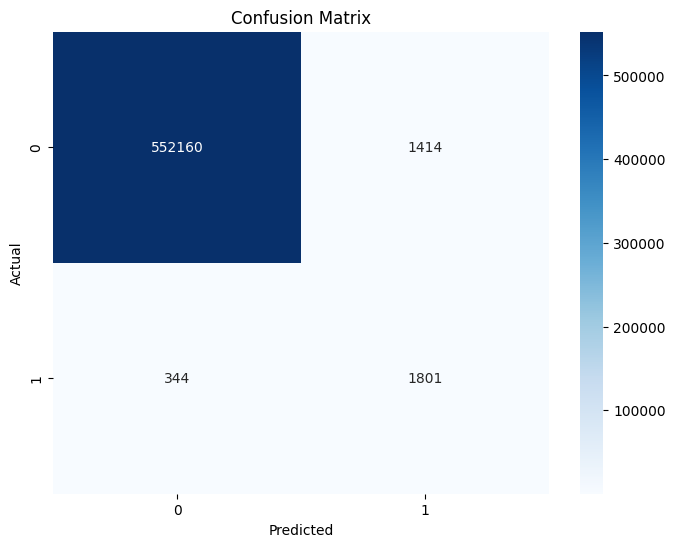

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

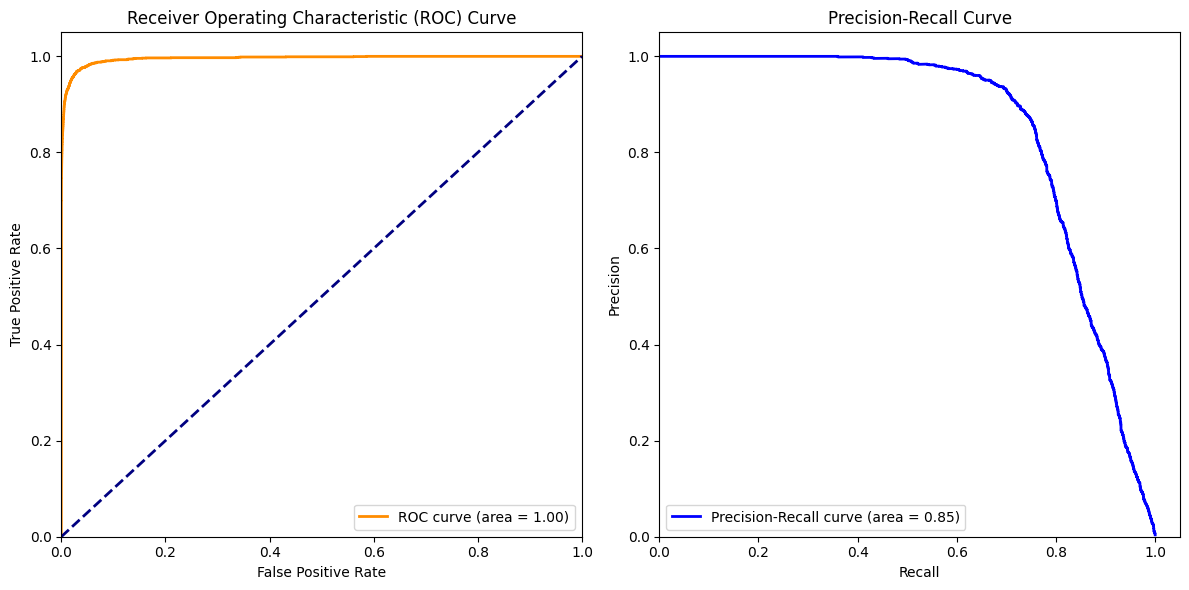

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {avg_precision:.2f})')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

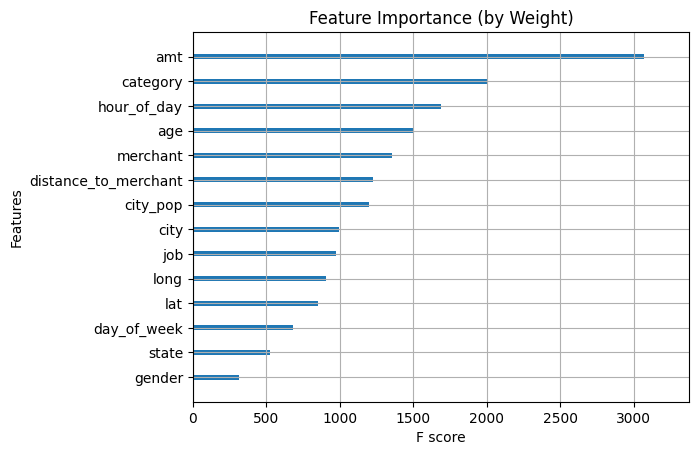

In [ ]:
# 3. Feature Importance Visualization
xgb.plot_importance(bst, importance_type='weight', title='Feature Importance (by Weight)', show_values=False)
plt.show()

## Gradient boosting with sampling

In [ ]:
# Predict
dtest1 = xgb.DMatrix(X_test)
y_pred_prob1 = bst1.predict(dtest1)
y_pred1 = np.round(y_pred_prob1)  # convert probabilities to class labels

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.17      0.77      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.88      0.63    555719
weighted avg       1.00      0.98      0.99    555719



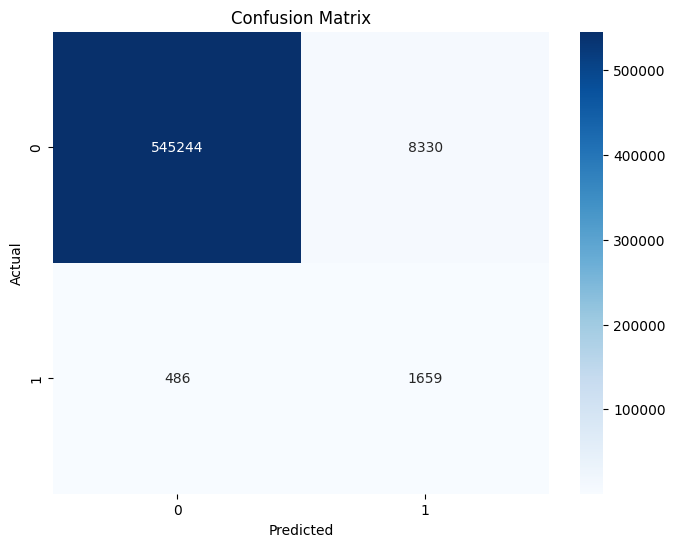

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

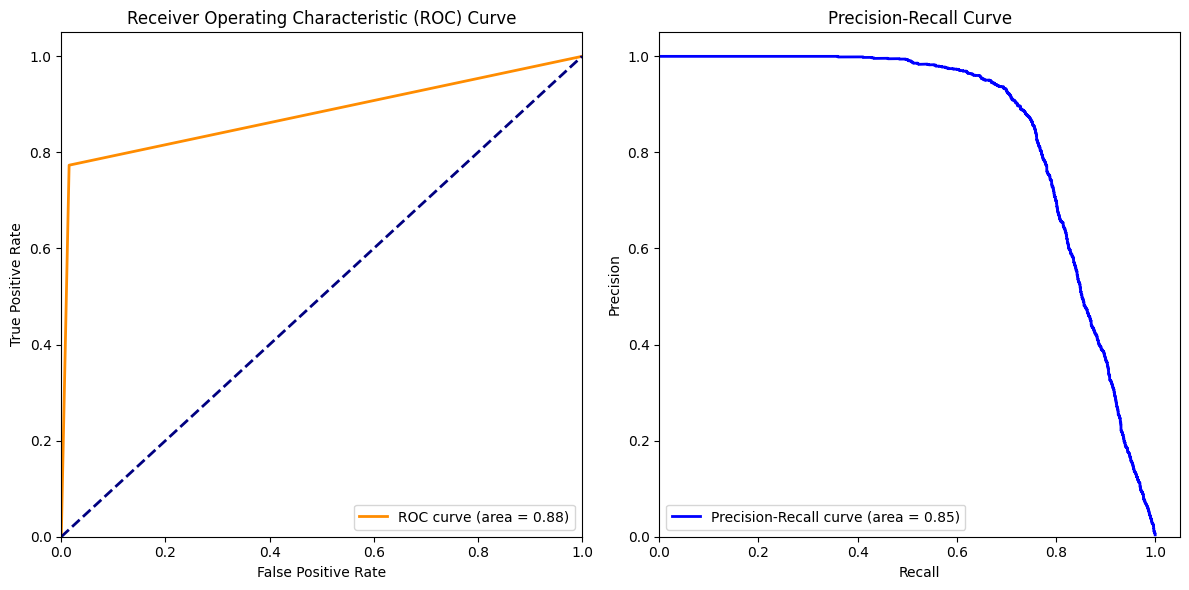

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred1)
auc = roc_auc_score(y_test, y_pred1)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {avg_precision:.2f})')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

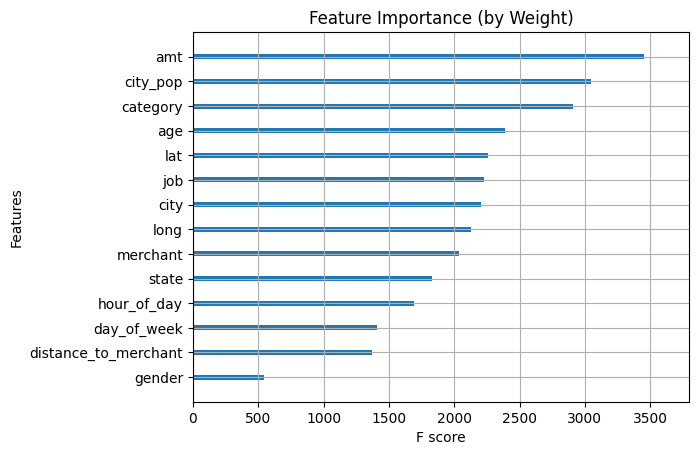

In [ ]:
# 3. Feature Importance Visualization
xgb.plot_importance(bst1, importance_type='weight', title='Feature Importance (by Weight)', show_values=False)
plt.show()